# 🎮 Gaming Engagement & Retention Analytics

**Objective**: Analyze player behavior to predict engagement levels (Low / Medium / High) and uncover insights for improving retention and monetization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("online_gaming_behavior.csv")
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [3]:
df['EngagementLevel_Num'] = df['EngagementLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [4]:
df = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre', 'GameDifficulty'], drop_first=True)

In [5]:
df['Playtime_per_Achievement'] = df['PlayTimeHours'] / (df['AchievementsUnlocked'] + 1)
df['Sessions_per_Hour'] = df['SessionsPerWeek'] / (df['PlayTimeHours'] * 7 + 1)

## 📊 Exploratory Data Analysis

### 📈 Engagement Level Distribution

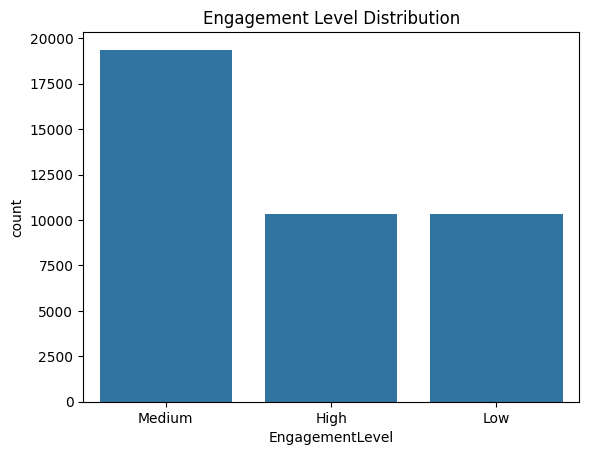

In [6]:
sns.countplot(x='EngagementLevel', data=df)
plt.title("Engagement Level Distribution")
plt.show()

### 🧮 Feature Correlation Heatmap

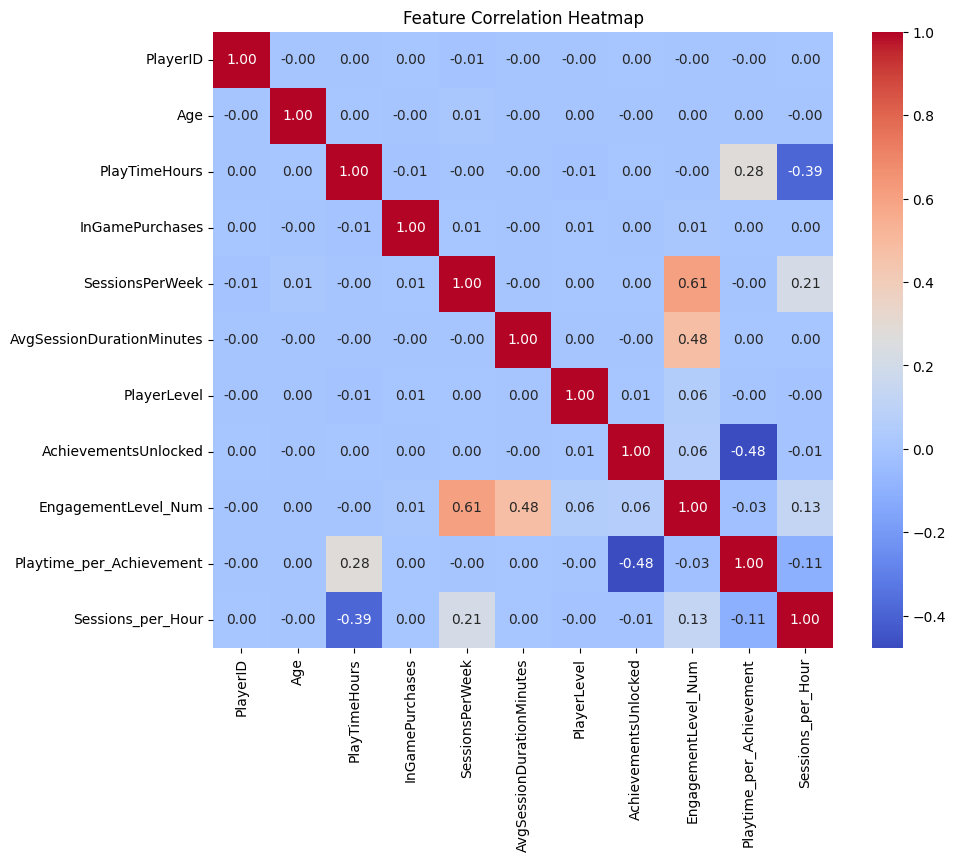

In [15]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### ⏱️ Play Time vs Engagement Level

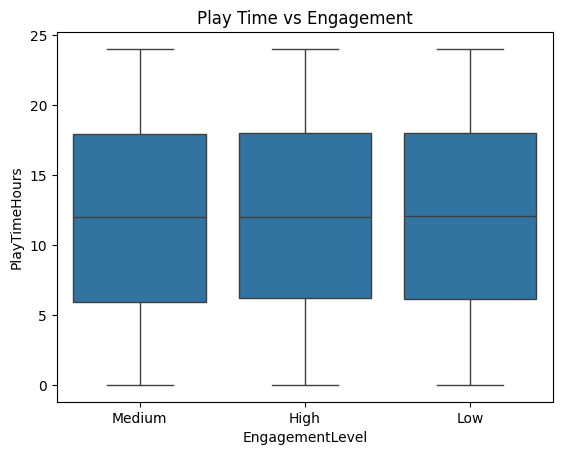

In [7]:
sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=df)
plt.title("Play Time vs Engagement")
plt.show()

### 📏 Session Duration vs Engagement Level


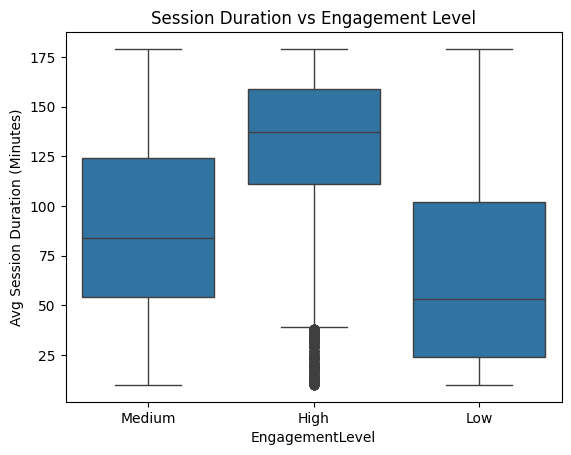

In [17]:
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=df)
plt.title("Session Duration vs Engagement Level")
plt.ylabel("Avg Session Duration (Minutes)")
plt.show()

### 🎻 Sessions Per Week (Violin Plot) by Engagement Level


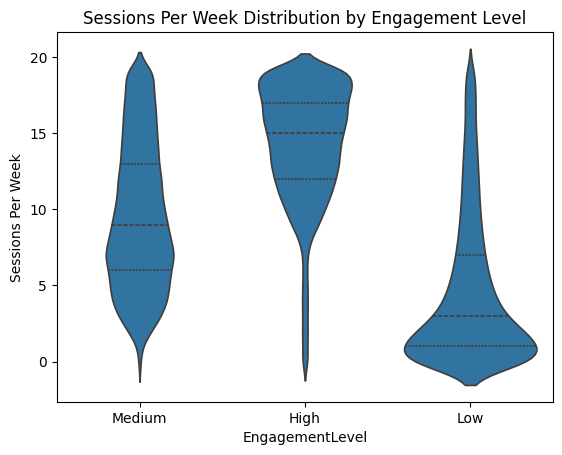

In [18]:
sns.violinplot(x='EngagementLevel', y='SessionsPerWeek', data=df, inner='quart')
plt.title("Sessions Per Week Distribution by Engagement Level")
plt.ylabel("Sessions Per Week")
plt.show()

### 💰 In-Game Purchases vs Engagement Level


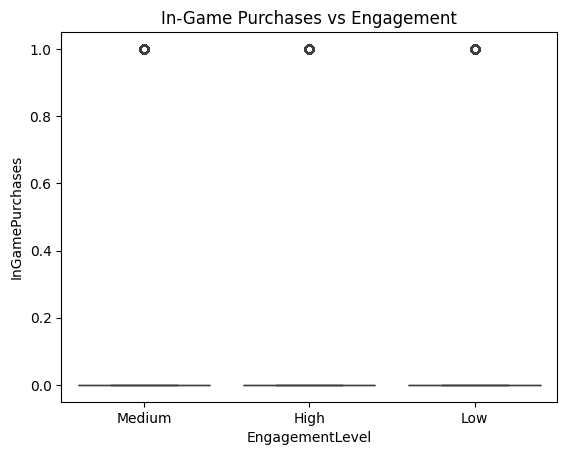

In [8]:
sns.boxplot(x='EngagementLevel', y='InGamePurchases', data=df)
plt.title("In-Game Purchases vs Engagement")
plt.show()

### 🧗‍♂️ Player Level by Engagement Level


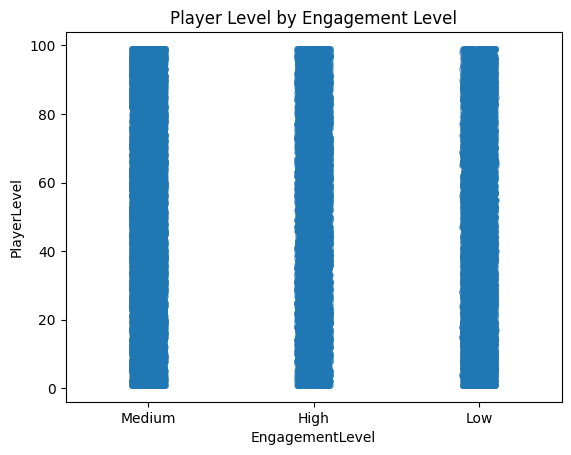

In [20]:
sns.stripplot(x='EngagementLevel', y='PlayerLevel', data=df, jitter=True, alpha=0.5)
plt.title("Player Level by Engagement Level")
plt.show()

### 🔁 Pairwise Feature Relationships (Pairplot)

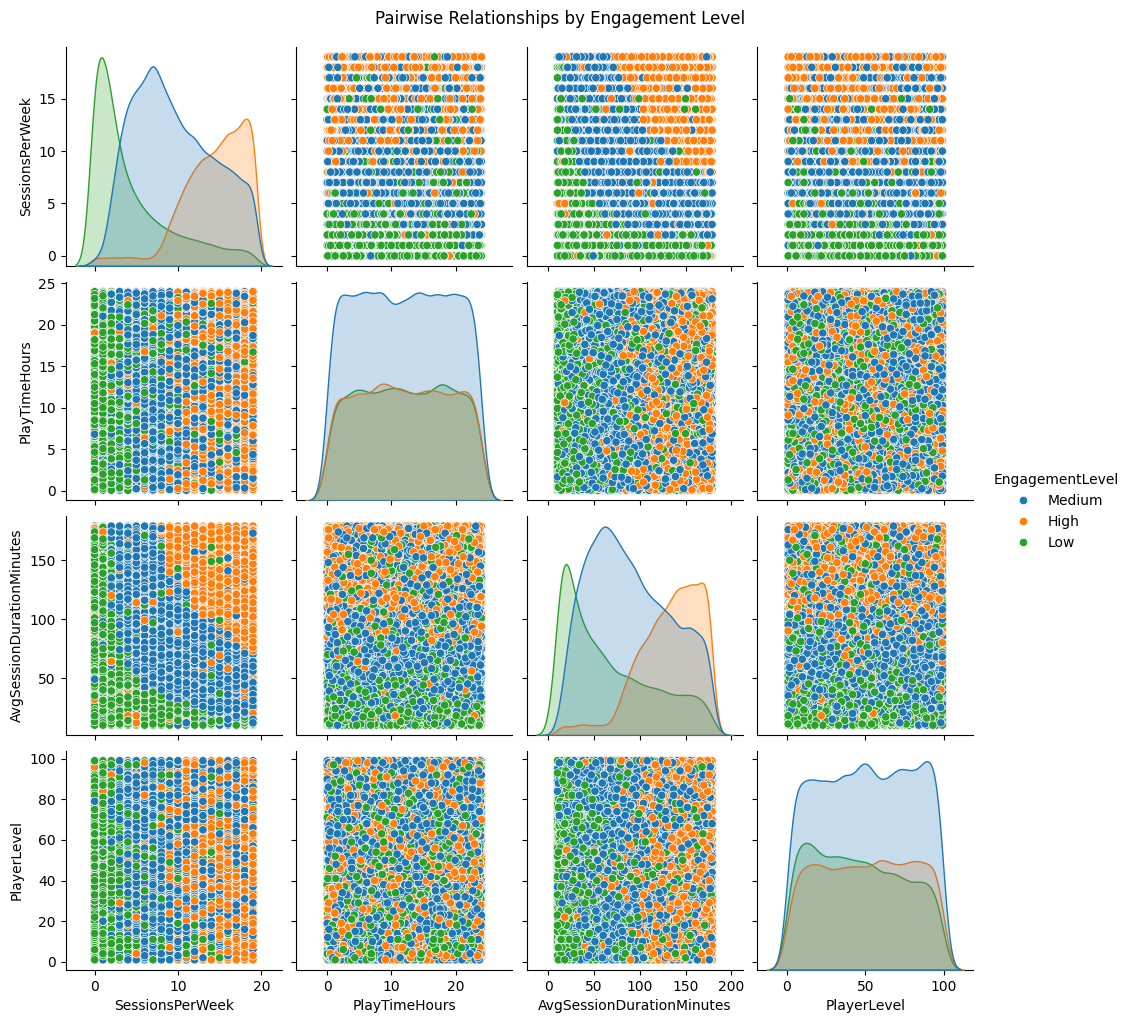

In [21]:
sns.pairplot(df, vars=['SessionsPerWeek', 'PlayTimeHours', 'AvgSessionDurationMinutes', 'PlayerLevel'], hue='EngagementLevel')
plt.suptitle("Pairwise Relationships by Engagement Level", y=1.02)
plt.show()

## 🤖 Model Building – Random Forest


In [26]:
X = df.drop(['EngagementLevel', 'EngagementLevel_Num', 'PlayerID'], axis=1)
y = df['EngagementLevel_Num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, stratify=y, random_state=42
)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 🧪 Model Evaluation


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

[[2237  271   73]
 [ 136 4574  134]
 [  72  260 2252]]
              precision    recall  f1-score   support

         Low       0.91      0.87      0.89      2581
      Medium       0.90      0.94      0.92      4844
        High       0.92      0.87      0.89      2584

    accuracy                           0.91     10009
   macro avg       0.91      0.89      0.90     10009
weighted avg       0.91      0.91      0.91     10009



## 🧬 Feature Importance Analysis


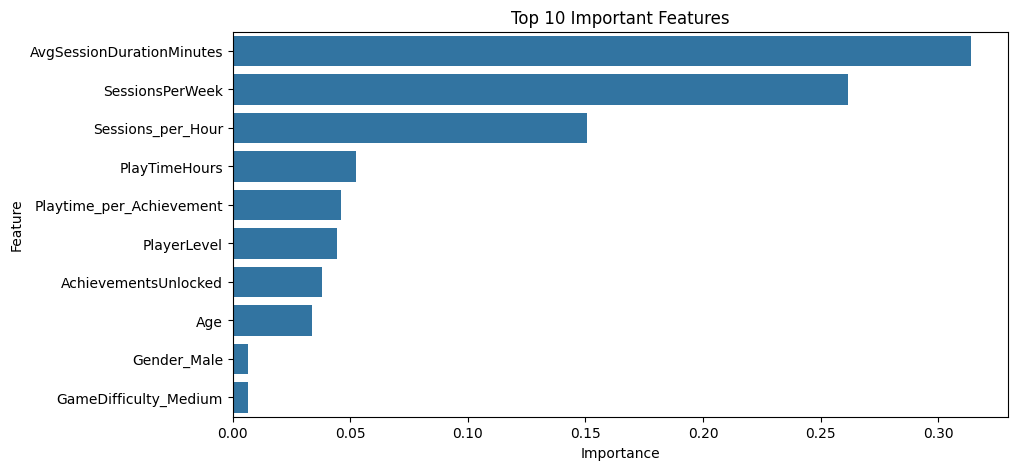

In [11]:
importances = model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 90.55%


## 📌 Key Insights Summary

- **Average Session Duration** and **Sessions Per Week** are the top two predictors of player engagement, contributing over **60% of total model importance** combined.
- Players with **High Engagement** typically show:
  - Session durations of **100–150 minutes**
  - Weekly session frequencies of **15–20 sessions** (vs. <5 for Low Engagement)
- **Sessions Per Week** violin plot reveals that Low-engaged users have a narrow distribution centered around 0–5 sessions, while high-engaged users cluster near 15–20 sessions.
- **Player Level** and **Achievements Unlocked** have mild positive correlations with engagement but are less influential than session-based behavior.
- Pairplot and boxplots confirm that:
  - High-engagement players play longer per session **and** more often
  - Medium engagement overlaps substantially with both High and Low, suggesting potential for targeted nudges (e.g., in-game rewards)
- **Demographics** like gender and age have negligible influence on engagement — confirming that behavioral metrics are far more actionable.
- **Recommendation:** Implement reward-based login streaks and mid-session ad placements for Medium-tier users, focusing on increasing session duration and frequency to elevate them to High engagement.
